In [1]:
import os

In [2]:
with_mask_files = os.listdir('./archive/data/with_mask')
print(with_mask_files[0])

with_mask_1.jpg


In [4]:
without_mask_files = os.listdir('./archive/data/without_mask')
print(without_mask_files[0])

without_mask_1.jpg


In [5]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


In [6]:
#create labels
#with mask--> 1
#without mask--> 0

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [7]:
with_mask_labels[0:5]

[1, 1, 1, 1, 1]

In [8]:
without_mask_labels[0:2]

[0, 0]

In [9]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [10]:
labels = with_mask_labels + without_mask_labels

In [11]:
len(labels)

7553

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

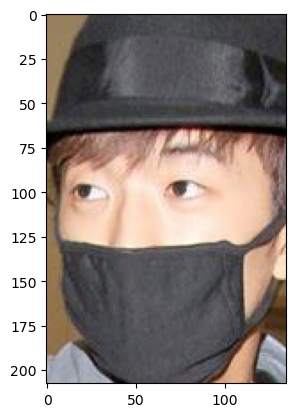

In [14]:
#displaying images
img = mpimg.imread('./archive/data/with_mask/with_mask_18.jpg')
imgplot = plt.imshow(img)
plt.show()


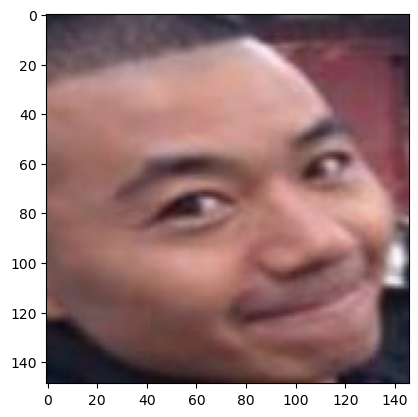

In [15]:
img = mpimg.imread('./archive/data/without_mask/without_mask_18.jpg')
implot = plt.imshow(img)
plt.show()

# image preprocessing

In [16]:
# resize image
#convert image to numpy array

#covert imgae to numpy array

In [21]:
from PIL import Image
import numpy as np

In [22]:
with_mask_path = './archive/data/with_mask/'

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path+img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
without_mask_path = './archive/data/without_mask/'

for img_file in without_mask_files:
    image = Image.open(without_mask_path+img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

C:\Users\savin\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
type(data)

list

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
#converting data into np array

X = np.array(data)
y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
X.shape

(7553, 128, 128, 3)

In [31]:
type(y)

numpy.ndarray

In [32]:
y.shape

(7553,)

In [35]:

from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [37]:
X_train.shape

(6042, 128, 128, 3)

In [38]:
X_test.shape

(1511, 128, 128, 3)

In [39]:
y_train.shape

(6042,)

In [40]:
y_test.shape

(1511,)

In [41]:
#Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [42]:
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

# # Building CNN

In [43]:
import tensorflow as tf
from tensorflow import keras

In [45]:
from keras.layers import Conv2D,MaxPooling2D

In [46]:
from keras import Sequential

In [49]:
num_of_classes = 2;

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes,activation = 'sigmoid'))


In [50]:
model.compile(optimizer ='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [51]:
history = model.fit(X_train_scaled,y_train,validation_split = 0.1,epochs = 5)

Epoch 1/5
170/170 [==============================] - 217s 1s/step - loss: 0.4507 - accuracy: 0.7993 - val_loss: 0.3489 - val_accuracy: 0.8529
Epoch 2/5
170/170 [==============================] - 206s 1s/step - loss: 0.3091 - accuracy: 0.8759 - val_loss: 0.2417 - val_accuracy: 0.9074
Epoch 3/5
170/170 [==============================] - 206s 1s/step - loss: 0.2435 - accuracy: 0.9051 - val_loss: 0.2503 - val_accuracy: 0.8909
Epoch 4/5
170/170 [==============================] - 206s 1s/step - loss: 0.2090 - accuracy: 0.9191 - val_loss: 0.2241 - val_accuracy: 0.9091
Epoch 5/5
170/170 [==============================] - 197s 1s/step - loss: 0.1862 - accuracy: 0.9281 - val_loss: 0.2611 - val_accuracy: 0.8959


model evaluation

In [52]:
loss, accuracy = model.evaluate(X_test_scaled,y_test)

48/48 [==============================] - 9s 180ms/step - loss: 0.2288 - accuracy: 0.9107


In [53]:
print(accuracy)

0.9106552004814148


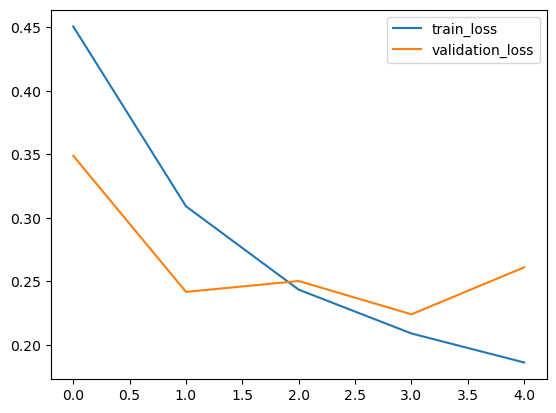

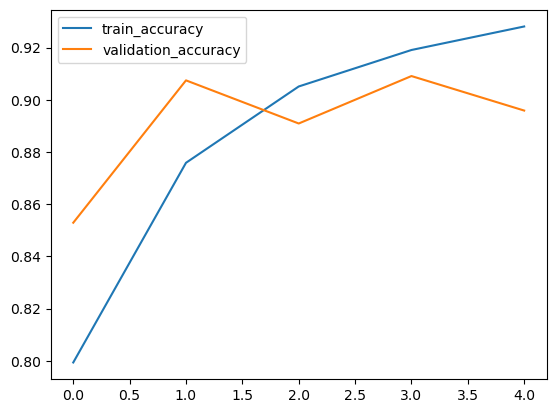

In [54]:
h = history

#plot loss value

plt.plot(h.history['loss'],label = 'train_loss')
plt.plot(h.history['val_loss'],label = 'validation_loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'],label = 'train_accuracy')
plt.plot(h.history['val_accuracy'],label = 'validation_accuracy')
plt.legend()
plt.show()



predictive System

give path of the image./input_file/WhatsApp Image 2023-06-22 at 14.34.17.jpeg


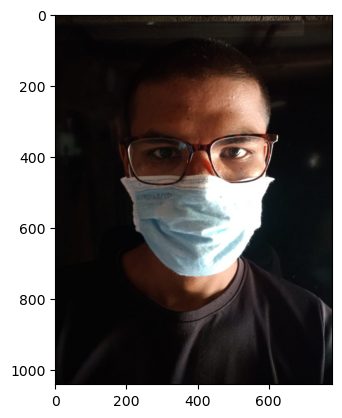

1/1 [==============================] - 0s 31ms/step
The person is wearing mask


In [78]:
input_image_path = input('give path of the image')

img = mpimg.imread(input_image_path)
imgplot = plt.imshow(img)
plt.show()


image = Image.open(input_image_path)

image = image.resize((128,128))
image = image.convert('RGB')
image = np.array(image)

scaled_image = image/255

scaled_image = np.reshape(scaled_image,[1,128,128,3])

pred = model.predict(scaled_image)

pred_label = np.argmax(pred)

if pred_label==1:
    print("The person is wearing mask")
else:
    print("the person is not wearing mask")

In [60]:
type(scaled_image)

numpy.ndarray

In [61]:
scaled_image.shape

(128, 128, 3)

In [62]:
scaled_image = np.reshape(scaled_image,[1,128,128,3])

In [63]:
scaled_image.shape

(1, 128, 128, 3)

In [64]:
model.predict(scaled_image)

1/1 [==============================] - 3s 3s/step


array([[0.24218324, 0.85153234]], dtype=float32)

In [72]:
import pickle

In [73]:
pickle.dump(model,open("face_detection_model_v1.pkl","wb"))

In [74]:
temp = pickle.load(open("face_detection_model_v1.pkl","rb"))

In [76]:
loss,accuracy = temp.evaluate(X_test_scaled,y_test)

48/48 [==============================] - 8s 169ms/step - loss: 0.2288 - accuracy: 0.9107
